In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
Mall_Customers = pd.read_csv('Mall_Customers.csv', encoding = 'gbk')

In [3]:
Mall_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 数据集说明：
一个商场，通过会员卡，收集的顾客数据。
•	CustomerID：顾客编号
•	Gender：性别
•	Age：年龄
•	Annual Income (k$)：年收入 单位：**千（美元）
•	Spending Score (1-100)：商场根据顾客消费行为评的综合分数（分值1至00）

## 作业内容：

### 1.	计算顾客平均年龄


In [4]:
Mall_Customers['Age'].mean()

38.85

### 2.	计算顾客男女比例（饼图）


In [5]:
Mall_Customers['Gender'].value_counts() /Mall_Customers['Gender'].count()

Female    0.56
Male      0.44
Name: Gender, dtype: float64

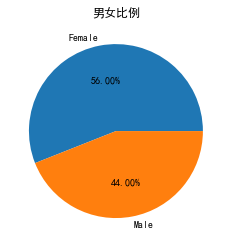

In [6]:
labels=['Female','Male']
X = Mall_Customers['Gender'].value_counts() /Mall_Customers['Gender'].count()



fig = plt.figure()
plt.pie(X,labels=labels,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("男女比例")
  

plt.show()  

### 3.	计算男性顾客和女性顾客的平均评分（柱状图）


In [7]:
Score_count_df = Mall_Customers.groupby(['Gender'])['Spending Score (1-100)'].mean()
Score_count_df


Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

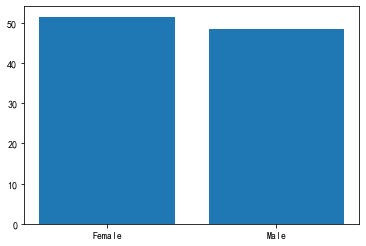

In [8]:
data = Score_count_df

plt.bar(labels, data)
plt.show()

### 4.	将客户年龄分为少年【0-20】，青年【20-40】，中年【40-60】，老年【60-80】，4个年龄段，计算四个年龄段的顾客平均收入（柱状图）

In [9]:
'''for 循环实现方式'''
#res = pd.concat([df1,df2,df3],axis=0,ignore_index=True)

# juvenile_group = Mall_Customers[0:0]

# youth_group = Mall_Customers[0:0]

# middle_group = Mall_Customers[0:0]

# old_group = Mall_Customers[0:0]

'for 循环实现方式'

In [10]:
# #juvenile_group =  pd.concat([juvenile_group,df2],axis=0)
# for i in range(len(Mall_Customers['Age'])):
#     if Mall_Customers['Age'][i]<=20:        
#         df2 = Mall_Customers[i:i+1]
#         juvenile_group =  pd.concat([juvenile_group,df2],axis=0)
    
#     if Mall_Customers['Age'][i]>20 and Mall_Customers['Age'][i]<=40:        
#         df2 = Mall_Customers[i:i+1]
#         youth_group =  pd.concat([youth_group,df2],axis=0)
        
#     if Mall_Customers['Age'][i]>40 and Mall_Customers['Age'][i]<=60:        
#         df2 = Mall_Customers[i:i+1]
#         middle_group =  pd.concat([middle_group,df2],axis=0)
        
#     if Mall_Customers['Age'][i]>60 and Mall_Customers['Age'][i]<=80:        
#         df2 = Mall_Customers[i:i+1]
#         old_group =  pd.concat([old_group,df2],axis=0)

In [11]:
age_cut_df = pd.cut(Mall_Customers["Age"],[0,20,40,60,80],labels=["少年","青年","中年","老年"],right=False)
age_cut_df.value_counts()

青年    104
中年     64
老年     20
少年     12
Name: Age, dtype: int64

In [12]:
age_cut_df = age_cut_df.to_list()
age_cut_df = pd.Series(age_cut_df,name='groups')
Mall_Customers_1 = pd.concat([Mall_Customers, age_cut_df], axis=1)
Mall_Customers_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),groups
0,1,Male,19,15,39,少年
1,2,Male,21,15,81,青年
2,3,Female,20,16,6,青年
3,4,Female,23,16,77,青年
4,5,Female,31,17,40,青年
...,...,...,...,...,...,...
195,196,Female,35,120,79,青年
196,197,Female,45,126,28,中年
197,198,Male,32,126,74,青年
198,199,Male,32,137,18,青年


In [13]:
Age_count_df = Mall_Customers_1[['Annual Income (k$)', 'groups']]
Age_count_df = Age_count_df.rename({'Annual Income (k$)':'Income'},axis=1)

In [14]:
Age_count_df = Age_count_df.groupby(by=['groups'])['Income'].sum().sort_values(ascending=False)
Age_count_df.head()

groups
青年    6510
中年    3961
老年     980
少年     661
Name: Income, dtype: int64

In [15]:
# data = []
# data_list = ['0-20','20-40','40-60','60-80']
# data.append(juvenile_group['Annual Income (k$)'].mean())
# data.append(youth_group['Annual Income (k$)'].mean())
# data.append(middle_group['Annual Income (k$)'].mean(),)
# data.append(old_group['Annual Income (k$)'].mean())




# plt.bar(data_list, data)
# plt.show()

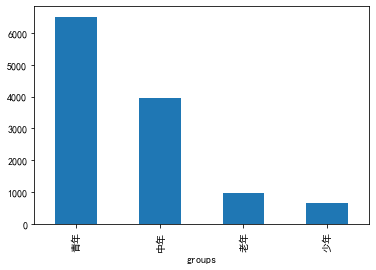

In [16]:
Age_count_df.plot(kind = 'bar')